### Project 1.0


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:\\Users\\laksh\\Desktop\\dall\\linkedin-reviews.csv")

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


### Exploratory Data Analysis
we will start by analyzing the distributions of rating. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews , and possibly derive insights from the text of the reviews.

### Plotting the Distribution of Ratings

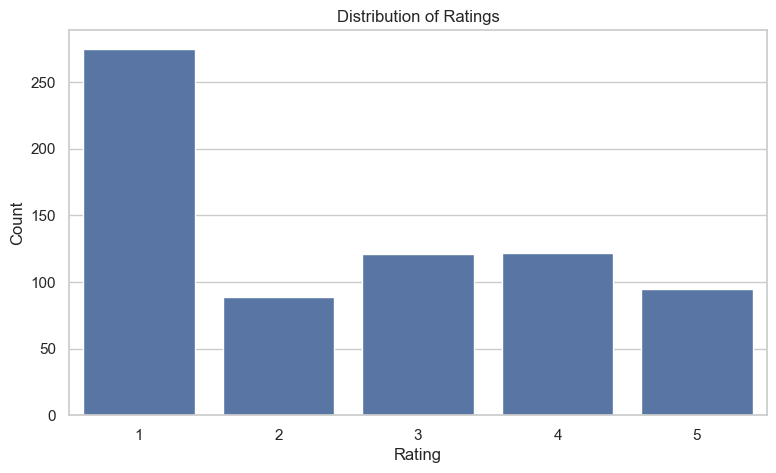

In [8]:
sns.set(style = "whitegrid")
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

###  Adding Sentiment Labes in the Data 
we will use Textblob library. Textblob provides a polority scores raning from -1(very negative) to 1(very positive) for a given text. We can use this score to classify each review's statement as positive , negative or neutral.

In [9]:
from textblob import TextBlob

In [17]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1 :
        return 'Positive'
    elif sentiment.polarity < -0.1 :
        return 'Negative'
    else :
        return 'Neutral'
        

In [18]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [19]:
df.sample(5)

,Review,Rating,Sentiment
207,Good app but need the ability to access group ...,4,Positive
142,App doesnt remember login.,4,Neutral
429,Crashes most of the time and when it does open...,1,Neutral
282,No widget... What's the use?,3,Neutral
451,Someone pls fix this app.,1,Neutral


### Analysis App Reviews Sentiments

In [21]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

Sentiment
Positive    298
Neutral     297
Negative    107
Name: count, dtype: int64

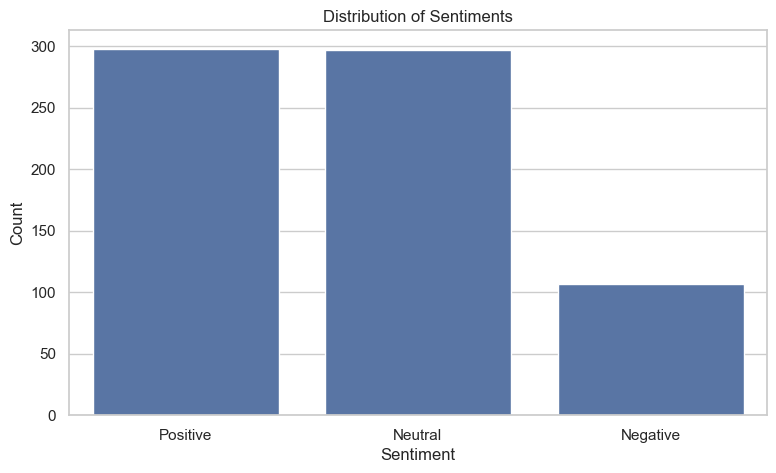

In [22]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index ,
           y = sentiment_distribution.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### So, we can see althrough the app has low rating , still the reviewrs dont use many negative words in the words in the reviews for the app.
Next, we'll explore the relationship between the sentiments and the ratings,.This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical rating.

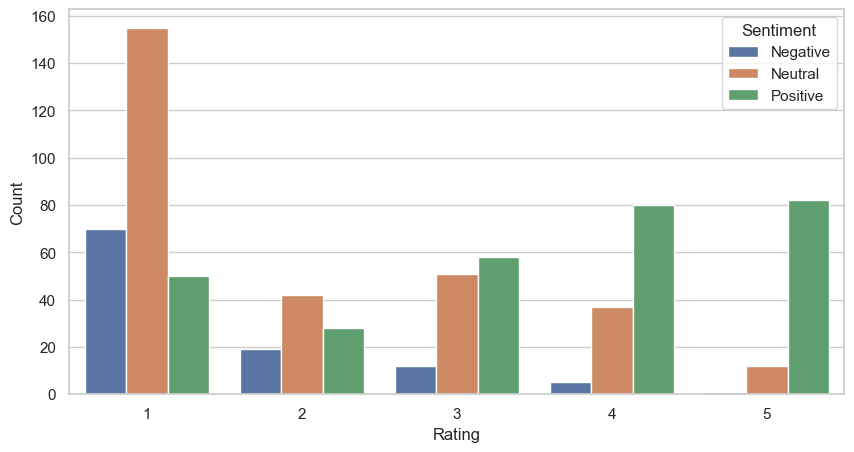

In [23]:
plt.figure(figsize = (10,5))
sns.countplot(data = df,
             x = 'Rating' ,
             hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()